<a href="https://colab.research.google.com/github/MykolaKud/python_for_ds_tasks/blob/main/hw_4_5_%D0%92%D1%96%D0%B7%D1%83%D0%B0%D0%BB%D1%96%D0%B7%D0%B0%D1%86%D1%96%D1%8F_%D0%B7_seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


У цьому домашньому завданні ми продовжуємо працювати з набором даних `Yulu`, з яким почали працювати в "hw 4.3. Робота з DataFrame. Діаграма розсіювання.". Фокус цього ДЗ в тому, аби будувати візуалізації використовуючи методи бібліотеки `seaborn`. Це дозволяє будувати гарніні візуалізації, а іноді також робити це швидше, ніж з `matplotlib`.

Документація до тої частини бібліотеки, з якою тут працюємо

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

### Профіль колонок набору даних:

- **datetime**: дата та час зібрані погодинно
- **season**: сезон (1: весна, 2: літо, 3: осінь, 4: зима)
- **holiday**: чи є день святковим (витягнуто з http://dchr.dc.gov/page/holiday-schedule)
- **workingday**: якщо день не є вихідним або святковим, то позначається як 1, в іншому випадку – 0.
- **weather**:
  1. Ясно, Мало хмарно, частково хмарно
  2. Туман + Хмарно, Туман + Розірвані хмари, Туман + Мало хмарно, Туман
  3. Легкий сніг, Легкий дощ + Гроза + Розсіяні хмари, Легкий дощ + Розсіяні хмари
  4. Сильний дощ + Крижані кулі + Гроза + Туман, Сніг + Туман
- **temp**: температура в градусах Цельсія
- **atemp**: як відчувається температура в градусах Цельсія
- **humidity**: вологість
- **windspeed**: швидкість вітру
- **casual**: кількість неформальних користувачів
- **registered**: кількість зареєстрованих користувачів
- **count**: загальна кількість велосипедів, взятих в оренду, включаючи неформальних та зареєстрованих користувачів

0. Імпортуйте бібліотеки `matplotlib.pyplot`, `seaborn` та `pandas`.  Завантажте дані з файла `yulu_rental.csv` у `pandas.DataFrame` `df`.

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


%matplotlib inline

In [4]:
data_path = 'drive/MyDrive/data_csv/yulu_rental.csv'
df = pd.read_csv(data_path)

1. Користуючись методом `seaborn.jointplot` побудуйте візуалізацію графіка розсіювання між змінними `humidity` та `count`, зазначивши колір точки в відповідності до значення змінної `weather`. Опишіть свої спостереження з графіку. Що бачите цікавого і корисного для прийняття рішень на основі цих даних?

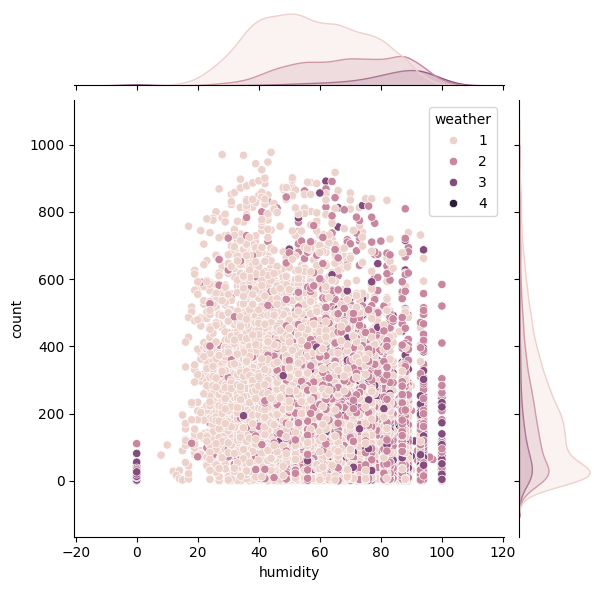

In [ ]:
sns.jointplot(data=df, x="humidity", y="count", hue="weather");

***Більша кількість випадків оренди велосипедів відбувається в дні з ясною погодою і погодою без опадів (1 і 2) і середньою вологістю повітря. У більшості днів з погодою 3 та 4 (сніг,дощ) було менше 300 випадків оренди велосипедів на день***

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=16BksRhZzoz4ynPKCPjXEek56XBsAEF6T)

2. Відфільтруйте і збережіть в окремій змінній лише дані з сезоно "весна" і "літо" (звернітся до опису даних вгорі ноутбуку, аби зрозуміти, які значення вам треба обрати.
Користуючись методом `seaborn.jointplot` побудуйте візуалізацію графіка розсіювання між змінними `casual` та `registered`, зазначивши колір точки в відповідності до значення змінної `season`. Встановіть прозорість на 0.2.

Опишіть свої спостереження з графіку. Що бачите цікавого і корисного для прийняття рішень на основі цих даних?

In [5]:
df_spring_summer = df[df['season'].isin([1 , 2])]

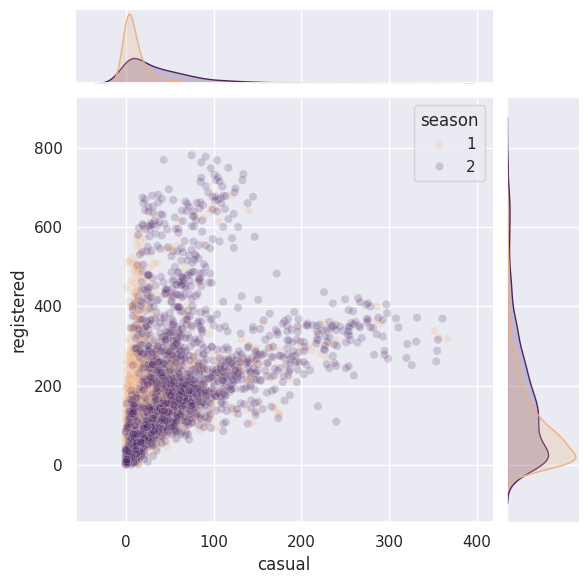

In [ ]:
sns.set_theme(style="darkgrid")
sns.jointplot(data=df_spring_summer, x="casual", y="registered", hue="season", alpha=0.2, palette="flare");

**З даного графіку можу зробити висновок, що на зареєстрованих користувачів менше впливає сезон, в той час, як звичайні випадкові користувачі (casual) мають значно більше реєстрацій влітку. Також влітку більша кількість реєстрацій на день в цілому по двох групах. Перевіримо це нижче:**

In [12]:
sum_grouped_season = df_spring_summer.groupby(by='season').sum()
sum_grouped_season

,datetime,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,,,,,,,,,,,
1,2011-01-01 00:00:002011-01-01 01:00:002011-01-...,71,1828,3826,33656.90,40904.975,151216,39314.9233,41605,270893,312498
2,2011-04-01 00:00:002011-04-01 01:00:002011-04-...,48,1893,3889,62376.58,72826.520,166311,36637.5229,129672,458610,588282


3. Для дослідження як розподілу значень  `humidity` в залежності від погоди (`weather`) побудуйте візуалізацію типу "ящик з вусами" (box plot)користуючись відповідним методом бібліотеки seaborn:

https://seaborn.pydata.org/generated/seaborn.boxplot.html


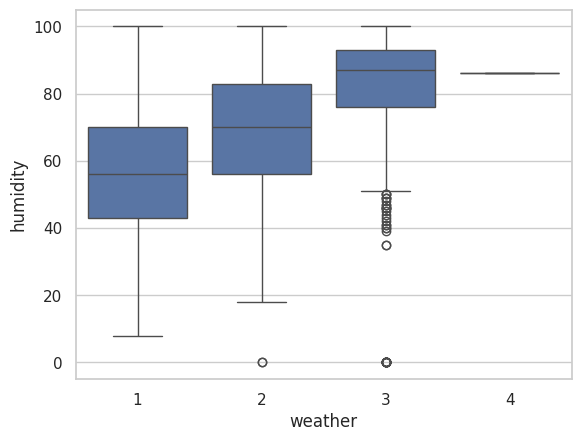

In [ ]:
sns.set_theme(style="whitegrid")
sns.boxplot(data=df, x='weather', y='humidity');


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1_6CBacvDlbuV1XD9GNoGn9sJOSfr74pS)


4. Використайте бібліотеку Seaborn для створення **парних графіків** (pairplot) розсіювання, які показуватимуть взаємозв'язки між кількістю зареєстрованих, неформальних користувачів та загальною кількістю велосипедів, взятих на прокат. Кожен графік повинен розрізняти робочі та святкові дні за кольором.

Для побудови цієї візуалізації спочатку відфільтруйте потрібні колонки в даних і потім зробіть візуалізацію.

Проаналізуйте візуалізацію і скажіть, чи можна виявити особливу поведінку користувачів у святкові дні з цих графіків?

In [ ]:
df_filter = df[['registered', 'casual','count','workingday']]

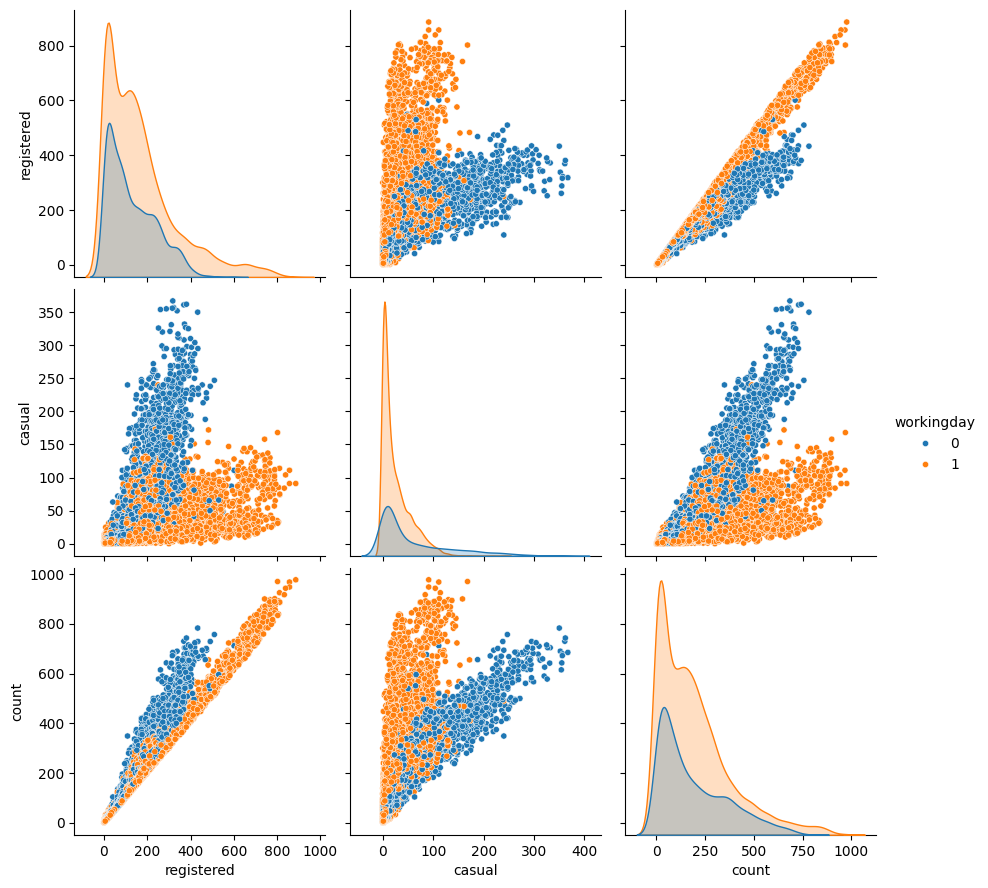

In [ ]:
sns.pairplot(data=df_filter, hue='workingday', height=3, plot_kws={'s': 20});

***З цих графіків можна зробити такі висновки:***
***1. В святкові дні менше користувачів в цілому (співвідношення count/count)***
***2. У casual користувачів більше користувань у святкові дні (співвідношення casual/count)***
***3. у registered користувачів менше користувань у святкові дні. ***
***Можна зробити висновок, що у святкові дні люди користуються велосипедами незаплановано, іспульсно.***

5. Змініть тип даних колонки `datetime` на `pandas.datetime`.

In [ ]:
df['datetime'] = pd.to_datetime(df.datetime)

 Тепер давайте візуалізуємо кількість зареєстрованих та казуальних користувачів поденно. Для цього виконайте код нижче і після цього створіть нову змінну `df_viz` яка містить лише колонки `'date', 'registered', 'casual'`, згрупуйте дані за датою і відобразіть на **одному** графіку поденну динаміку двох показників з допомогою `pandas.plot`.

In [ ]:
df['date'] = df.datetime.dt.date

In [ ]:
df_viz = df[['date', 'registered', 'casual']]

In [ ]:
grouped_by_date = df_viz.groupby('date')

In [ ]:
clients_quantity = grouped_by_date[['registered', 'casual']].sum()

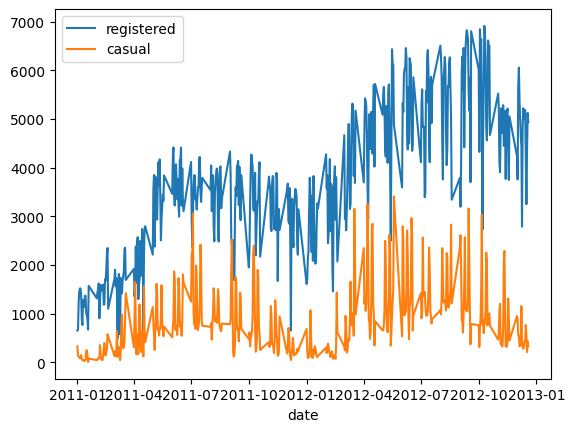

In [ ]:
clients_quantity.plot();

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1XGBqmFLXiI_v-MBEOiCQNyW6sUpvII1n)
